## 1 位置与姿态的表示（齐次变换）
手册中使用 4×4 的齐次变换矩阵来表示位姿。Robotics Toolbox for Python 依赖其配套的 spatialmath-python 库来处理这些运算。

- 实现:
    - 创建旋转矩阵：SO3.Rx(angle, unit='deg')
    - 创建平移向量：SE3.Tx(dist)
    - 组合成齐次变换矩阵：SE3.Rx(0.5) * SE3.Ty(0.5)

In [ ]:
import numpy as np
from spatialmath import SE3, SO3

# 创建一个绕Z轴旋转90度的旋转矩阵
R = SO3.Rz(90, 'deg')
print("旋转矩阵:\n", R)

# 创建一个沿X轴平移0.5米，Y轴平移0.3米的齐次变换矩阵
T = SE3.Tx(0.5) * SE3.Ty(0.3)
print("\n齐次变换矩阵:\n", T)

# 矩阵的逆表示坐标系的反向变换
T_inv = T.inv()
print("\n逆矩阵:\n", T_inv)

旋转矩阵:
    0        -1         0         
   1         0         0         
   0         0         1         


齐次变换矩阵:
    1         0         0         0.5       
   0         1         0         0.3       
   0         0         1         0         
   0         0         0         1         


逆矩阵:
    1         0         0        -0.5       
   0         1         0        -0.3       
   0         0         1         0         
   0         0         0         1         



## 2. 正向运动学 (使用 D-H 参数)
这是本章的重点。你可以使用D-H参数直接定义一个机器人，然后计算其正向运动学。

- 实现:
    - 定义连杆 (RevoluteDH)，输入D-H参数 (d, a, alpha, q_offset)。
    - 将连杆组合成机器人模型 (DHRobot)。
    - 使用 .fkine() 方法计算正向运动学。

示例：复现一个简单的两连杆平面机械臂

假设D-H参数表为：
| Link | d | a | alpha |
| :--- | :-: | :-: | :----: |
| 1    | 0 | L1  | 0      |
| 2    | 0 | L2  | 0      |

DHRobot: 2-Link Arm, 2 joints (RR), dynamics, standard DH parameters
┌─────┬────┬────┬──────┐
│ θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │
├─────┼────┼────┼──────┤
│  q1 │  0 │  1 │ 0.0° │
│  q2 │  0 │  1 │ 0.0° │
└─────┴────┴────┴──────┘

┌──┬──┐
└──┴──┘


末端执行器位姿:
    0.2588   -0.9659    0         1.125     
   0.9659    0.2588    0         1.466     
   0         0         1         0         
   0         0         0         1         



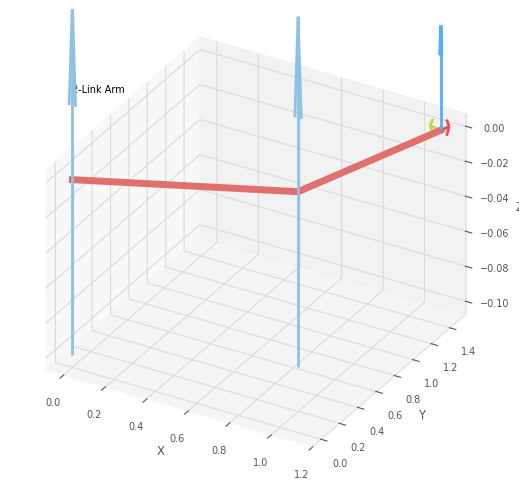

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [5]:
import roboticstoolbox as rtb
import numpy as np

# 定义连杆长度
L1 = 1.0
L2 = 1.0

# 创建机器人模型
# RevoluteDH(d, a, alpha)
link1 = rtb.RevoluteDH(a=L1)
link2 = rtb.RevoluteDH(a=L2)
robot = rtb.DHRobot([link1, link2], name="2-Link Arm")

print(robot)

# 定义关节角度 (q1=30度, q2=45度)
q = np.deg2rad([30, 45])

# 计算正向运动学
T_end_effector = robot.fkine(q)
print("\n末端执行器位姿:\n", T_end_effector)

# 可视化
robot.plot(q, block=True)

## 3. 逆向运动学
逆向运动学（IK）通常更复杂。RTB-P提供了多种数值求解器。

- 实现:
    - 定义一个期望的末端执行器位姿 T_desired (一个 SE3 对象)。
    - 使用 .ikine_LM() (Levenberg-Marquardt) 或 .ikine_NR() (Newton-Raphson) 等方法求解。

In [12]:
# 定义一个期望到达的目标位姿 (例如：x=0.8, y=0.5, z=0)
T_desired = SE3.Tx(0.8) * SE3.Ty(0.5)

# 使用Levenberg-Marquardt方法求解逆运动学
# q0是求解的初始关节角猜测
sol = robot.ikine_LM(T_desired, q0=np.zeros(robot.n))

if sol.success:
    print("求解成功！关节角度为:", np.rad2deg(sol.q))
    # 验证解
    print("求解出的位姿:\n", robot.fkine(sol.q))
    robot.plot(sol.q, block=True)
else:
    print("逆运动学无解。")

逆运动学无解。
